# Squid Parts

In [1]:
import math

n = 6
for i in range(n):
    angle = i/n
    t = i%2==0 and "_squid_jewel" or "_squid_hood"
    if i>0:
        print(f'{t};a_offset,{angle:.{4}}')
    else:
        print(f'{t};a_offset,{angle:.{4}},cost,5')

for i in range(n):
    angle = i/n
    y_offset = 52.0
    for j in range(4):
        scale = 1-0.8*j/4
        swirl = j/1.5
        print(f'_squid_tentacle;a_offset,{angle:.{4}},scale,{scale:.{4}},swirl,{swirl:.{4}},radius,{8.0*scale:.{4}},y_offset,{y_offset:.{4}}')
        y_offset += 8*scale

_squid_jewel;a_offset,0.0,cost,5
_squid_hood;a_offset,0.1667
_squid_jewel;a_offset,0.3333
_squid_hood;a_offset,0.5
_squid_jewel;a_offset,0.6667
_squid_hood;a_offset,0.8333
_squid_tentacle;a_offset,0.0,scale,1.0,swirl,0.0,radius,8.0,y_offset,52.0
_squid_tentacle;a_offset,0.0,scale,0.8,swirl,0.6667,radius,6.4,y_offset,60.0
_squid_tentacle;a_offset,0.0,scale,0.6,swirl,1.333,radius,4.8,y_offset,66.4
_squid_tentacle;a_offset,0.0,scale,0.4,swirl,2.0,radius,3.2,y_offset,71.2
_squid_tentacle;a_offset,0.1667,scale,1.0,swirl,0.0,radius,8.0,y_offset,52.0
_squid_tentacle;a_offset,0.1667,scale,0.8,swirl,0.6667,radius,6.4,y_offset,60.0
_squid_tentacle;a_offset,0.1667,scale,0.6,swirl,1.333,radius,4.8,y_offset,66.4
_squid_tentacle;a_offset,0.1667,scale,0.4,swirl,2.0,radius,3.2,y_offset,71.2
_squid_tentacle;a_offset,0.3333,scale,1.0,swirl,0.0,radius,8.0,y_offset,52.0
_squid_tentacle;a_offset,0.3333,scale,0.8,swirl,0.6667,radius,6.4,y_offset,60.0
_squid_tentacle;a_offset,0.3333,scale,0.6,swirl,1.333,rad

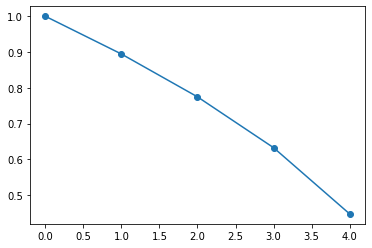

In [12]:
import numpy as np
import matplotlib.pyplot as plt
xv = np.linspace(0, 4, 5) # Generates 30 points between 0 and 4
yv = np.zeros(len(xv))

for i in range(len(xv)):
    yv[i] = np.sqrt(1-0.8*xv[i]/4)


plt.plot(xv, yv, '-o')
plt.show()

# Adjust Vertex Indices

In [19]:
planes="""
1; 2;0;0;2;5;6;7;8;0x0000.0404; -2;32;0;2;20;19;18;17;0x0008.0404; -3;-256;0;1;5;8;20;17;0x0004.0404; 3;768;0;1;7;6;18;19;0x0004.0404; -1;-192;2;1;17;18;6;5;0x0004.0404
2; 2;0;0;2;1;2;3;4;0x0000.0404; -2;32;0;2;16;15;14;13;0x0008.0404; -3;-192;0;1;1;4;16;13;0x0004.0404; 3;832;0;1;3;2;14;15;0x0004.0404; -1;-256;2;1;8;1;13;20;0x0004.0404; -1;-256;2;1;2;7;19;14;0x0004.0404; 1;768;2;1;10;3;15;22;0x0004.0404; 1;768;2;1;4;9;21;16;0x0004.0404
3; 2;0;0;2;9;10;11;12;0x0000.0404; -2;32;0;2;24;23;22;21;0x0008.0404; -3;-256;0;1;9;12;24;21;0x0004.0404; 1;832;2;1;24;12;11;23;0x0004.0404; 3;768;0;1;11;10;22;23;0x0004.0404
"""
out = ""
for plane in planes.splitlines():
  if len(plane)>0:
    surfaces = plane.split(" ")
    out += f"{surfaces[0]} "
    surfaces = surfaces[1:]
    tmp = []
    for surface in surfaces:
      # explode surface
      n,cp,u,v,v0,v1,v2,v3,texture = surface.strip(";").split(";")
      v0 = (int(v0)-1)*3+1
      v1 = (int(v1)-1)*3+1
      v2 = (int(v2)-1)*3+1
      v3 = (int(v3)-1)*3+1
      tmp.append(";".join([n,cp,u,v,str(v0),str(v1),str(v2),str(v3),texture]))
    out += "; ".join(tmp)
    out += "\n"
print(out) 

1; 2;0;0;2;13;16;19;22;0x0000.0404; -2;32;0;2;58;55;52;49;0x0008.0404; -3;-256;0;1;13;22;58;49;0x0004.0404; 3;768;0;1;19;16;52;55;0x0004.0404; -1;-192;2;1;49;52;16;13;0x0004.0404
2; 2;0;0;2;1;4;7;10;0x0000.0404; -2;32;0;2;46;43;40;37;0x0008.0404; -3;-192;0;1;1;10;46;37;0x0004.0404; 3;832;0;1;7;4;40;43;0x0004.0404; -1;-256;2;1;22;1;37;58;0x0004.0404; -1;-256;2;1;4;19;55;40;0x0004.0404; 1;768;2;1;28;7;43;64;0x0004.0404; 1;768;2;1;10;25;61;46;0x0004.0404
3; 2;0;0;2;25;28;31;34;0x0000.0404; -2;32;0;2;70;67;64;61;0x0008.0404; -3;-256;0;1;25;34;70;61;0x0004.0404; 1;832;2;1;70;34;31;67;0x0004.0404; 3;768;0;1;31;28;64;67;0x0004.0404



# Platform Geometry

In [2]:
import numpy as np
import pyvista as pv
import copy

width=256
ear=64
height=32

vertices= [
    # main block
    [ear,0,0],
    [ear,0,2*ear+width],
    [ear+width,0,2*ear+width],
    [ear+width,0,0],
    # left ear
    [0,0,ear],
    [0,0,ear+width],
    [ear,0,ear+width],
    [ear,0,ear],
    # right ear
    [ear+width,0,ear],
    [ear+width,0,ear+width],
    [2*ear+width,0,ear+width],
    [2*ear+width,0,ear]]
n = len(vertices)
for i in range(n):
  v = copy.copy(vertices[i])
  v[1] = -32
  vertices.append(v)

# shift vertices in place
for v in vertices:
  v[0] += 512-width/2-ear
  v[2] += 512-width/2-ear

planes=f"""
1; 5;6;7;8;0x0000.0404; 20;19;18;17;0x0008.0404; 5;8;20;17;0x0004.0404; 7;6;18;19;0x0004.0404; 17;18;6;5;0x0004.0404
2; 1;2;3;4;0x0000.0404; 16;15;14;13;0x0008.0404; 1;4;16;13;0x0004.0404; 3;2;14;15;0x0004.0404; 8;1;13;20;0x0004.0404; 2;7;19;14;0x0004.0404; 10;3;15;22;0x0004.0404; 4;9;21;16;0x0004.0404
3; 9;10;11;12;0x0000.0404; 24;23;22;21;0x0008.0404; 9;12;24;21;0x0004.0404; 24;12;11;23;0x0004.0404; 11;10;22;23;0x0004.0404
"""

meshes=[]
for plane in planes.splitlines():
  if len(plane)>0:
    surfaces = plane.split(" ")
    surfaces = surfaces[1:]
    faces = []
    for surface in surfaces:
      # explode surface
      v0,v1,v2,v3,texture = surface.strip(";").split(";")
      faces.append([4, int(v0)-1,int(v1)-1,int(v2)-1,int(v3)-1])
      
    meshes.append(pv.PolyData(np.array(vertices), np.hstack(faces)))

# surf.plot(show_edges=True, line_width=2)
out = ""
textures = {}
textures[2] = "0x0000.1010"
textures[-2] = "0x0014.0404"

map_displays = {}
map_displays[2] = 1

for i,mesh in enumerate(meshes):
  surface = f"{i+1}; "
  faces = mesh.faces
  normals = mesh.face_normals
  tmp = []
  for j in range(0,len(faces),5):
    v0,v1,v2,v3 = faces[j+1],faces[j+2],faces[j+3],faces[j+4]
    # normal
    n = normals[j//5]
    # major
    major = next(k for k,v in enumerate(n) if v!=0)
    # camera plane
    cp = n[major] * vertices[faces[j+1]][major]
    # uv coords
    u,v = [(2,1),(0,2),(0,1)][major]
    # texture
    major_side = int(np.sign(n[major]) * (major+1))
    texture = textures.get(major_side, "0x0010.0404")
    map_display = map_displays.get(major_side, 0)
    v0,v1,v2,v3 = map(lambda x: x*3 + 1,(v0,v1,v2,v3))
    tmp.append(";".join(map(str,[major_side,cp,u,v,v0,v1,v2,v3,texture,map_display])))
  out += surface + "; ".join(tmp) + "\n"

print(f"radius: {width/2+ear}")

print("------vertices------")
tmp = ""
for v in vertices:
  tmp += ",".join(map(str,v)) + ",\n"
print(tmp)

print("------extents------")
tmp = ""
for i,mesh in enumerate(meshes):
  faces = mesh.faces
  xmin,xmax,ymin,ymax=32000,-32000,32000,-32000
  for j in range(0,len(faces),5):
    for k in range(4):
      v = vertices[faces[j+k+1]]
      xmin = min(xmin,v[0])
      xmax = max(xmax,v[0])
      ymin = min(ymin,v[2])
      ymax = max(ymax,v[2])
  tmp += f"split\"{','.join(map(str,(xmin-8,xmax+8,ymin-8,ymax+8)))}\",\n"
print(tmp)

print("------bsp--------")
print(f"""0;2;0;-1;grid
-1;1;{512-width/2};1;-2
-2;1;{512+width/2};2;3""")
print("----surfaces---------")
print(out)
# generate bsp string
pl = pv.Plotter()
for mesh in meshes:
  pl.add_mesh(mesh)
pl.show()

radius: 192.0
------vertices------
384.0,0,320.0,
384.0,0,704.0,
640.0,0,704.0,
640.0,0,320.0,
320.0,0,384.0,
320.0,0,640.0,
384.0,0,640.0,
384.0,0,384.0,
640.0,0,384.0,
640.0,0,640.0,
704.0,0,640.0,
704.0,0,384.0,
384.0,-32,320.0,
384.0,-32,704.0,
640.0,-32,704.0,
640.0,-32,320.0,
320.0,-32,384.0,
320.0,-32,640.0,
384.0,-32,640.0,
384.0,-32,384.0,
640.0,-32,384.0,
640.0,-32,640.0,
704.0,-32,640.0,
704.0,-32,384.0,

------extents------
split"312.0,392.0,376.0,648.0",
split"376.0,648.0,312.0,712.0",
split"632.0,712.0,376.0,648.0",

------bsp--------
0;2;0;-1;grid
-1;1;384.0;1;-2
-2;1;640.0;2;3
----surfaces---------
1; 2;0.0;0;2;13;16;19;22;0x0000.1010;1; -2;32.0;0;2;58;55;52;49;0x0014.0404;0; -3;-384.0;0;1;13;22;58;49;0x0010.0404;0; 3;640.0;0;1;19;16;52;55;0x0010.0404;0; -1;-320.0;2;1;49;52;16;13;0x0010.0404;0
2; 2;0.0;0;2;1;4;7;10;0x0000.1010;1; -2;32.0;0;2;46;43;40;37;0x0014.0404;0; -3;-320.0;0;1;1;10;46;37;0x0010.0404;0; 3;704.0;0;1;7;4;40;43;0x0010.0404;0; -1;-384.0;2;1;22;1;37;58;0

Widget(value="<iframe src='http://localhost:61326/index.html?ui=P_0x18a3d0c5dc0_1&reconnect=auto' style='width…

In [ ]:
%md
# Spawn sequence

In [1]:
# https://devildaggers.info/Wiki/Spawns
spawns=[
3.0, "SQUID I",
14.0, "SQUID I",
19.0, "SQUID I",
24.0, "SQUID I",
39.0, "SQUID II",
39.0, "SPIDER I",
49.0, "SQUID II",
49.0, "SQUID I",
64.0, "SQUID II",
64.0, "SQUID I",
79.0, "SQUID II",
79.0, "SQUID I",
94.0, "SQUID II",
94.0, "SQUID I",
109.0, "SQUID II",
114.0, "CENTIPEDE",
119.0, "SPIDER I",
134.0, "SQUID II",
134.0, "SQUID I",
144.0, "SQUID II",
144.0, "SQUID I",
154.0, "SQUID II",
154.0, "SQUID I",
164.0, "SQUID II",
164.0, "SQUID I",
174.0, "CENTIPEDE",
174.0, "SPIDER I",
174.0, "SPIDER I",
174.0, "SPIDER I",
184.0, "SQUID II",
184.0, "SQUID I",
189.0, "SQUID II",
189.0, "SQUID I",
194.0, "SQUID II",
194.0, "SQUID I",
199.0, "SPIDER I",
199.0, "SPIDER I",
199.0, "SPIDER I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
239.0, "SQUID II",
239.0, "SQUID II",
239.0, "SQUID II",
244.0, "SQUID III",
259.0, "GIGAPEDE",
274.0, "SPIDER II",
274.0, "SPIDER I",
274.0, "SPIDER I",
289.0, "SPIDER II",
289.0, "SPIDER I",
289.0, "SPIDER I",
304.0, "SQUID III",
304.0, "SQUID III",
304.0, "SQUID III",
330.0, "SQUID II",
330.0, "SQUID II",
330.0, "SQUID II",
350.0, "LEVIATHAN",
365.0, "SQUID I",
365.0, "SQUID I",
365.0, "SQUID I",
370.0, "SQUID II",
370.0, "SQUID II",
370.0, "SQUID II",
375.0, "SQUID III",
397.0, "SQUID III",
400.0, "SQUID II",
400.0, "SQUID I",
406.0, "SQUID I",
406.0, "SQUID II",
412.0, "GIGAPEDE",
417.0, "SPIDER I",
418.0, "SPIDER I",
419.0, "SPIDER II",
424.0, "SQUID I",
424.0, "SQUID I",
427.0, "SQUID II",
430.0, "SQUID III",
440.0, "SQUID I",
441.0, "SQUID II",
442.0, "GHOSTPEDE",
447.0, "THORN",
449.0, "THORN",
451.0, "THORN",
455.0, "SQUID I",
455.0, "SQUID I",
458.0, "SQUID II",
458.0, "SQUID I",
461.0, "SQUID III",
467.0, "GIGAPEDE",
472.0, "SPIDER II",
473.0, "SPIDER I",
474.0, "SPIDER I",
484.0, "THORN",
485.0, "THORN",
486.0, "THORN",
491.0, "SPIDER I",
492.0, "SPIDER I",
497.0, "SQUID I",
502.0, "SQUID I",
507.0, "SQUID II",
511.0, "SQUID I",
511.0, "SQUID I",
514.0, "SQUID II",
514.0, "SQUID I",
516.0, "SQUID III",
521.0, "GIGAPEDE",
525.0, "SPIDER II",
526.0, "SPIDER I",
527.0, "SPIDER I",
536.0, "THORN",
537.0, "THORN",
538.0, "THORN",
542.0, "SPIDER I",
543.0, "SPIDER I",
547.0, "SQUID I",
552.0, "SQUID I",
556.0, "SQUID II",
560.0, "SQUID I",
560.0, "SQUID I",
563.0, "SQUID II",
563.0, "SQUID I",
565.0, "SQUID III",
569.0, "GHOSTPEDE",
573.0, "SPIDER II",
574.0, "SPIDER I",
575.0, "SPIDER I",
583.0, "THORN",
583.0, "THORN",
584.0, "THORN",
588.0, "SPIDER I",
589.0, "SPIDER I",
593.0, "SQUID I",
597.0, "SQUID I",
601.0, "SQUID II",
605.0, "SQUID I",
605.0, "SQUID I",
607.0, "SQUID II",
607.0, "SQUID I",
609.0, "SQUID III",
613.0, "GIGAPEDE",
616.0, "SPIDER II",
617.0, "SPIDER I",
618.0, "SPIDER I",
625.0, "THORN",
626.0, "THORN",
627.0, "THORN",
630.0, "SPIDER I",
631.0, "SPIDER I",
635.0, "SQUID I",
638.0, "SQUID I",
642.0, "SQUID II",
645.0, "SQUID I",
645.0, "SQUID I",
647.0, "SQUID II",
647.0, "SQUID I",
649.0, "SQUID III",
652.0, "GIGAPEDE",
656.0, "SPIDER II",
656.0, "SPIDER I",
657.0, "SPIDER I",
664.0, "THORN",
664.0, "THORN",
665.0, "THORN",
668.0, "SPIDER I",
669.0, "SPIDER I",
672.0, "SQUID I",
676.0, "SQUID I",
679.0, "SQUID II",
682.0, "SQUID I",
682.0, "SQUID I",
684.0, "SQUID II",
684.0, "SQUID I",
686.0, "SQUID III",
689.0, "GHOSTPEDE",
692.0, "SPIDER II",
693.0, "SPIDER I",
693.0, "SPIDER I",
699.0, "THORN",
700.0, "THORN",
701.0, "THORN",
704.0, "SPIDER I",
704.0, "SPIDER I",
707.0, "SQUID I",
711.0, "SQUID I",
714.0, "SQUID II",
716.0, "SQUID I",
716.0, "SQUID I",
718.0, "SQUID II",
718.0, "SQUID I",
720.0, "SQUID III",
723.0, "GIGAPEDE",
726.0, "SPIDER II",
726.0, "SPIDER I",
727.0, "SPIDER I",
732.0, "THORN",
733.0, "THORN",
734.0, "THORN",
736.0, "SPIDER I",
737.0, "SPIDER I",
740.0, "SQUID I",
743.0, "SQUID I",
746.0, "SQUID II",
748.0, "SQUID I",
748.0, "SQUID I",
750.0, "SQUID II",
750.0, "SQUID I",
751.0, "SQUID III",
754.0, "GIGAPEDE",
757.0, "SPIDER II",
757.0, "SPIDER I",
758.0, "SPIDER I",
763.0, "THORN",
764.0, "THORN",
764.0, "THORN",
767.0, "SPIDER I",
767.0, "SPIDER I",
770.0, "SQUID I",
773.0, "SQUID I",
775.0, "SQUID II",
778.0, "SQUID I",
778.0, "SQUID I",
779.0, "SQUID II",
779.0, "SQUID I",
781.0, "SQUID III",
783.0, "GHOSTPEDE",
786.0, "SPIDER II",
786.0, "SPIDER I",
787.0, "SPIDER I",
792.0, "THORN",
792.0, "THORN",
793.0, "THORN",
795.0, "SPIDER I",
796.0, "SPIDER I",
798.0, "SQUID I",
801.0, "SQUID I",
803.0, "SQUID II",
806.0, "SQUID I",
806.0, "SQUID I",
807.0, "SQUID II",
807.0, "SQUID I",
809.0, "SQUID III",
811.0, "GIGAPEDE",
813.0, "SPIDER II",
814.0, "SPIDER I",
814.0, "SPIDER I",
819.0, "THORN",
819.0, "THORN",
820.0, "THORN",
822.0, "SPIDER I",
823.0, "SPIDER I",
825.0, "SQUID I",
827.0, "SQUID I",
830.0, "SQUID II",
832.0, "SQUID I",
832.0, "SQUID I",
833.0, "SQUID II",
833.0, "SQUID I",
835.0, "SQUID III",
837.0, "GIGAPEDE",
839.0, "SPIDER II",
840.0, "SPIDER I",
840.0, "SPIDER I",
844.0, "THORN",
845.0, "THORN",
845.0, "THORN",
848.0, "SPIDER I",
848.0, "SPIDER I",
850.0, "SQUID I",
852.0, "SQUID I",
855.0, "SQUID II",
857.0, "SQUID I",
857.0, "SQUID I",
858.0, "SQUID II",
858.0, "SQUID I",
859.0, "SQUID III",
861.0, "GHOSTPEDE",
864.0, "SPIDER II",
864.0, "SPIDER I",
864.0, "SPIDER I",
869.0, "THORN",
869.0, "THORN",
869.0, "THORN",
872.0, "SPIDER I",
872.0, "SPIDER I",
874.0, "SQUID I",
876.0, "SQUID I",
878.0, "SQUID II",
880.0, "SQUID I",
880.0, "SQUID I",
881.0, "SQUID II",
881.0, "SQUID I",
883.0, "SQUID III",
885.0, "GIGAPEDE",
887.0, "SPIDER II",
887.0, "SPIDER I",
887.0, "SPIDER I",
891.0, "THORN",
892.0, "THORN",
892.0, "THORN",
894.0, "SPIDER I",
895.0, "SPIDER I",
897.0, "SQUID I",
899.0, "SQUID I",
901.0, "SQUID II",
903.0, "SQUID I",
903.0, "SQUID I",
904.0, "SQUID II",
904.0, "SQUID I",
905.0, "SQUID III",
907.0, "GIGAPEDE",
909.0, "SPIDER II",
909.0, "SPIDER I",
909.0, "SPIDER I",
913.0, "THORN",
914.0, "THORN",
914.0, "THORN",
916.0, "SPIDER I",
916.0, "SPIDER I",
918.0, "SQUID I",
920.0, "SQUID I",
922.0, "SQUID II",
924.0, "SQUID I",
924.0, "SQUID I",
925.0, "SQUID II",
925.0, "SQUID I",
926.0, "SQUID III",
928.0, "GHOSTPEDE",
930.0, "SPIDER II",
930.0, "SPIDER I",
930.0, "SPIDER I",
934.0, "THORN",
934.0, "THORN",
935.0, "THORN",
937.0, "SPIDER I",
937.0, "SPIDER I",
939.0, "SQUID I",
941.0, "SQUID I",
942.0, "SQUID II",
944.0, "SQUID I",
944.0, "SQUID I",
945.0, "SQUID II",
945.0, "SQUID I",
946.0, "SQUID III",
948.0, "GIGAPEDE",
950.0, "SPIDER II",
950.0, "SPIDER I",
950.0, "SPIDER I",
954.0, "THORN",
954.0, "THORN",
955.0, "THORN",
956.0, "SPIDER I",
957.0, "SPIDER I",
958.0, "SQUID I",
960.0, "SQUID I",
962.0, "SQUID II",
964.0, "SQUID I",
964.0, "SQUID I",
965.0, "SQUID II",
965.0, "SQUID I",
966.0, "SQUID III",
967.0, "GIGAPEDE",
969.0, "SPIDER II",
969.0, "SPIDER I",
970.0, "SPIDER I",
973.0, "THORN",
973.0, "THORN",
974.0, "THORN",
975.0, "SPIDER I",
976.0, "SPIDER I",
977.0, "SQUID I",
979.0, "SQUID I",
981.0, "SQUID II",
982.0, "SQUID I",
982.0, "SQUID I",
983.0, "SQUID II",
983.0, "SQUID I",
984.0, "SQUID III",
986.0, "GHOSTPEDE",
987.0, "SPIDER II",
988.0, "SPIDER I",
988.0, "SPIDER I",
991.0, "THORN",
991.0, "THORN",
992.0, "THORN",
993.0, "SPIDER I",
994.0, "SPIDER I",
995.0, "SQUID I",
997.0, "SQUID I",
998.0, "SQUID II"]


In [3]:
# mapping OG game --> demi daggers
spawn_types={
  "SQUID I":"make_squid;1",
  "SQUID II":"make_squid;2",
  "SQUID III":"make_squid;3",
  "CENTIPEDE":"make_worm;normal",
  "GIGAPEDE":"make_worm;mega",
  "GHOSTPEDE":"make_worm;giga",
  "SPIDER I":"make_spider;1",
  "SPIDER II":"make_spider;2",
  "THORN": "make_mine"
}
specials=["CENTIPEDE","GIGAPEDE","GHOSTPEDE","SPIDER I","SPIDER II"]
small_radius=["CENTIPEDE","GIGAPEDE","GHOSTPEDE","THORN"]
spawn_time=0
cmds = []
prefix = "_scenario=[["
for i in range(0,len(spawns),2):  
  t = spawns[i]
  cls = spawns[i+1]
  spawn_func = spawn_types.get(cls,"//;not supported")
  wait_time = t - spawn_time
  spawn_time = t
  if wait_time>0:
    cmds.append(f"{prefix}wait_async;{wait_time*30:g}")
    prefix=""
  cmds.append(f"{prefix}{spawn_func}")
  prefix=""
with open("../carts/scenario_release.p8l","w") as f:
  f.write("\n".join(cmds))

Exception: unknown class: LEVIATHAN

In [11]:
seq="""3.0000
Squid I
2
2
2
14.0000
Squid I
2
4
4
19.0000
Squid I
2
6
6
24.0000
Squid I
2
8
8
39.0000
Squid II
3
11
11
39.0000
Spider I
1
12
12
49.0000
Squid II
3
15
15
49.0000
Squid I
2
17
17
64.0000
Squid II
3
20
20
64.0000
Squid I
2
22
22
79.0000
Squid II
3
25
25
79.0000
Squid I
2
27
27
94.0000
Squid II
3
30
30
94.0000
Squid I
2
32
32
109.0000
Squid II
3
35
35
114.0000
Centipede
25
60
60
119.0000
Spider I
1
61
61
134.0000
Squid II
3
64
64
134.0000
Squid I
2
66
66
144.0000
Squid II
3
69
69
144.0000
Squid I
2
71
1
154.0000
Squid II
3
74
4
154.0000
Squid I
2
76
6
164.0000
Squid II
3
79
9
164.0000
Squid I
2
81
11
174.0000
Centipede
25
106
36
174.0000
Spider I
1
107
37
174.0000
Spider I
1
108
38
174.0000
Spider I
1
109
39
184.0000
Squid II
3
112
42
184.0000
Squid I
2
114
44
189.0000
Squid II
3
117
47
189.0000
Squid I
2
119
49
194.0000
Squid II
3
122
52
194.0000
Squid I
2
124
54
199.0000
Spider I
1
125
55
199.0000
Spider I
1
126
56
199.0000
Spider I
1
127
57
229.0000
Squid I
2
129
59
229.0000
Squid I
2
131
61
229.0000
Squid I
2
133
63
229.0000
Squid I
2
135
65
229.0000
Squid I
2
137
67
229.0000
Squid I
2
139
69
239.0000
Squid II
3
142
72
239.0000
Squid II
3
145
75
239.0000
Squid II
3
148
78
244.0000
Squid III
3
151
81
259.0000
Gigapede
50
201
131
259.0000
Gigapede
50
251
31
259.0000
Gigapede
50
301
81
274.0000
Spider II
1
302
82
274.0000
Spider I
1
303
83
274.0000
Spider I
1
304
84
289.0000
Spider II
1
305
85
289.0000
Spider I
1
306
86
289.0000
Spider I
1
307
87
304.0000
Squid III
3
310
90
304.0000
Squid III
3
313
93
304.0000
Squid III
3
316
96
330.0000
Squid II
3
319
99
330.0000
Squid II
3
322
102
330.0000
Squid II
3
325
105
350.0000
Leviathan
6
331
111
365.0000
Squid I
2
333
113
365.0000
Squid I
2
335
115
365.0000
Squid I
2
337
117
370.0000
Squid II
3
340
120
370.0000
Squid II
3
343
123
370.0000
Squid II
3
346
126
375.0000
Squid III
3
349
129
397.0000
Squid III
3
352
132
400.0000
Squid II
3
355
135
400.0000
Squid I
2
357
137
406.0000
Squid I
2
359
139
406.0000
Squid II
3
362
142
412.0000
Gigapede
50
412
192
417.0000
Spider I
1
413
193
418.0000
Spider I
1
414
194
419.0000
Spider II
1
415
195
424.0000
Squid I
2
417
197
424.0000
Squid I
2
419
199
427.0000
Squid II
3
422
202
430.0000
Squid III
3
425
205
440.0000
Squid I
2
427
207
441.0000
Squid II
3
430
210
442.0000
Ghostpede
10
440
220
447.0000
Thorn
0
440
220
449.0000
Thorn
0
440
220
451.0000
Thorn
0
440
220
455.9988
Squid I
2
442
222
455.9988
Squid I
2
444
224
458.9980
Squid II
3
447
227
458.9980
Squid I
2
449
229
461.9973
Squid III
3
452
232
467.0128
Gigapede
50
502
282
472.0115
Spider II
1
503
283
473.0113
Spider I
1
504
284
474.0110
Spider I
1
505
285
484.0086
Thorn
0
505
285
485.0084
Thorn
0
505
285
486.0081
Thorn
0
505
285
491.0069
Spider I
1
506
286
492.0067
Spider I
1
507
287
497.0054
Squid I
2
509
289
502.0042
Squid I
2
511
291
507.0030
Squid II
3
514
294
511.4519
Squid I
2
516
296
511.4519
Squid I
2
518
298
514.1179
Squid II
3
521
301
514.1179
Squid I
2
523
303
516.7839
Squid III
3
526
306
521.2328
Gigapede
50
576
356
525.6818
Spider II
1
577
357
526.5649
Spider I
1
578
358
527.4480
Spider I
1
579
359
536.3458
Thorn
0
579
359
537.2289
Thorn
0
579
359
538.1121
Thorn
0
579
359
542.5610
Spider I
1
580
360
543.4441
Spider I
1
581
361
547.8930
Squid I
2
583
363
552.3419
Squid I
2
585
365
556.7742
Squid II
3
588
368
560.7732
Squid I
2
590
370
560.7732
Squid I
2
592
372
563.1726
Squid II
3
595
375
563.1726
Squid I
2
597
377
565.5887
Squid III
3
600
380
569.5877
Ghostpede
10
610
390
573.5701
Spider II
1
611
391
574.3699
Spider I
1
612
392
575.1697
Spider I
1
613
393
583.1677
Thorn
0
613
393
583.9675
Thorn
0
613
393
584.7673
Thorn
0
613
393
588.7830
Spider I
1
614
394
589.5828
Spider I
1
615
395
593.5818
Squid I
2
617
397
597.5809
Squid I
2
619
399
601.5799
Squid II
3
622
402
605.2290
Squid I
2
624
404
605.2290
Squid I
2
626
406
607.4118
Squid II
3
629
409
607.4118
Squid I
2
631
411
609.5779
Squid III
3
634
414
613.2271
Gigapede
50
684
464
616.8595
Spider II
1
685
465
617.5760
Spider I
1
686
466
618.3091
Spider I
1
687
467
625.5740
Thorn
0
687
467
626.3072
Thorn
0
687
467
627.0403
Thorn
0
687
467
630.6728
Spider I
1
688
468
631.4059
Spider I
1
689
469
635.0384
Squid I
2
691
471
638.6708
Squid I
2
693
473
642.3033
Squid II
3
696
476
645.6358
Squid I
2
698
478
645.6358
Squid I
2
700
480
647.6353
Squid II
3
703
483
647.6353
Squid I
2
705
485
649.6515
Squid III
3
708
488
652.9840
Gigapede
50
758
538
656.3165
Spider II
1
759
539
656.9830
Spider I
1
760
540
657.6495
Spider I
1
761
541
664.3146
Thorn
0
761
541
664.9811
Thorn
0
761
541
665.6476
Thorn
0
761
541
668.9634
Spider I
1
762
542
669.6299
Spider I
1
763
543
672.9625
Squid I
2
765
545
676.2950
Squid I
2
767
547
679.6275
Squid II
3
770
550
682.7101
Squid I
2
772
552
682.7101
Squid I
2
774
554
684.5596
Squid II
3
777
557
684.5596
Squid I
2
779
559
686.4092
Squid III
3
782
562
689.4751
Ghostpede
10
792
572
692.5577
Spider II
1
793
573
693.1742
Spider I
1
794
574
693.7907
Spider I
1
795
575
699.9392
Thorn
0
795
575
700.5557
Thorn
0
795
575
701.1722
Thorn
0
795
575
704.2382
Spider I
1
796
576
704.8547
Spider I
1
797
577
707.9373
Squid I
2
799
579
711.0198
Squid I
2
801
581
714.0858
Squid II
3
804
584
716.9517
Squid I
2
806
586
716.9517
Squid I
2
808
588
718.6680
Squid II
3
811
591
718.6680
Squid I
2
813
593
720.3842
Squid III
3
816
596
723.2335
Gigapede
50
866
646
726.0995
Spider II
1
867
647
726.6660
Spider I
1
868
648
727.2325
Spider I
1
869
649
732.9478
Thorn
0
869
649
733.5143
Thorn
0
869
649
734.0809
Thorn
0
869
649
736.9468
Spider I
1
870
650
737.5134
Spider I
1
871
651
740.3793
Squid I
2
873
653
743.2286
Squid I
2
875
655
746.0779
Squid II
3
878
658
748.7440
Squid I
2
880
660
748.7440
Squid I
2
882
662
750.3436
Squid II
3
885
665
750.3436
Squid I
2
887
667
751.9432
Squid III
3
890
670
754.6092
Gigapede
50
940
720
757.2752
Spider II
1
941
721
757.8084
Spider I
1
942
722
758.3416
Spider I
1
943
723
763.6736
Thorn
0
943
723
764.2068
Thorn
0
943
723
764.7401
Thorn
0
943
723
767.4061
Spider I
1
944
724
767.9393
Spider I
1
945
725
770.6053
Squid I
2
947
727
773.2713
Squid I
2
949
729
775.9373
Squid II
3
952
732
778.4534
Squid I
2
954
734
778.4534
Squid I
2
956
736
779.9530
Squid II
3
959
739
779.9530
Squid I
2
961
741
781.4360
Squid III
3
964
744
783.9354
Ghostpede
10
974
754
786.4348
Spider II
1
975
755
786.9346
Spider I
1
976
756
787.4512
Spider I
1
977
757
792.4500
Thorn
0
977
757
792.9498
Thorn
0
977
757
793.4497
Thorn
0
977
757
795.9491
Spider I
1
978
758
796.4490
Spider I
1
979
759
798.9484
Squid I
2
981
761
801.4478
Squid I
2
983
763
803.9471
Squid II
3
986
766
806.3132
Squid I
2
988
768
806.3132
Squid I
2
990
770
807.7129
Squid II
3
993
773
807.7129
Squid I
2
995
775
809.1292
Squid III
3
998
778
811.4786
Gigapede
50
1048
828
813.8281
Spider II
1
1049
829
814.3113
Spider I
1
1050
830
814.7778
Spider I
1
1051
831
819.4767
Thorn
0
1051
831
819.9432
Thorn
0
1051
831
820.4265
Thorn
0
1051
831
822.7759
Spider I
1
1052
832
823.2424
Spider I
1
1053
833
825.5919
Squid I
2
1055
835
827.9579
Squid I
2
1057
837
830.3074
Squid II
3
1060
840
832.5402
Squid I
2
1062
842
832.5402
Squid I
2
1064
844
833.8732
Squid II
3
1067
847
833.8732
Squid I
2
1069
849
835.2062
Squid III
3
1072
852
837.4223
Gigapede
50
1122
902
839.6384
Spider II
1
1123
903
840.0883
Spider I
1
1124
904
840.5382
Spider I
1
1125
905
844.9705
Thorn
0
1125
905
845.4203
Thorn
0
1125
905
845.8702
Thorn
0
1125
905
848.0864
Spider I
1
1126
906
848.5363
Spider I
1
1127
907
850.7524
Squid I
2
1129
909
852.9852
Squid I
2
1131
911
855.2013
Squid II
3
1134
914
857.3174
Squid I
2
1136
916
857.3174
Squid I
2
1138
918
858.5838
Squid II
3
1141
921
858.5838
Squid I
2
1143
923
859.8335
Squid III
3
1146
926
861.9496
Ghostpede
10
1156
936
864.0491
Spider II
1
1157
937
864.4657
Spider I
1
1158
938
864.8989
Spider I
1
1159
939
869.0979
Thorn
0
1159
939
869.5145
Thorn
0
1159
939
869.9477
Thorn
0
1159
939
872.0472
Spider I
1
1160
940
872.4637
Spider I
1
1161
941
874.5799
Squid I
2
1163
943
876.6794
Squid I
2
1165
945
878.7789
Squid II
3
1168
948
880.7950
Squid I
2
1170
950
880.7950
Squid I
2
1172
952
881.9948
Squid II
3
1175
955
881.9948
Squid I
2
1177
957
883.1778
Squid III
3
1180
960
885.1773
Gigapede
50
1230
1,010
887.1935
Spider II
1
1231
1,011
887.5934
Spider I
1
1232
1,012
887.9933
Spider I
1
1233
1,013
891.9923
Thorn
0
1233
1,013
892.3922
Thorn
0
1233
1,013
892.7921
Thorn
0
1233
1,013
894.7750
Spider I
1
1234
1,014
895.1749
Spider I
1
1235
1,015
897.1744
Squid I
2
1237
1,017
899.1739
Squid I
2
1239
1,019
901.1734
Squid II
3
1242
1,022
903.0896
Squid I
2
1244
1,024
903.0896
Squid I
2
1246
1,026
904.2227
Squid II
3
1249
1,029
904.2227
Squid I
2
1251
1,031
905.3724
Squid III
3
1254
1,034
907.2719
Gigapede
50
1304
1,084
909.1714
Spider II
1
1305
1,085
909.5547
Spider I
1
1306
1,086
909.9379
Spider I
1
1307
1,087
913.7537
Thorn
0
1307
1,087
914.1369
Thorn
0
1307
1,087
914.5035
Thorn
0
1307
1,087
916.4197
Spider I
1
1308
1,088
916.8029
Spider I
1
1309
1,089
918.7025
Squid I
2
1311
1,091
920.6020
Squid I
2
1313
1,093
922.5015
Squid II
3
1316
1,096
924.3344
Squid I
2
1318
1,098
924.3344
Squid I
2
1320
1,100
925.4175
Squid II
3
1323
1,103
925.4175
Squid I
2
1325
1,105
926.5172
Squid III
3
1328
1,108
928.3334
Ghostpede
10
1338
1,118
930.1497
Spider II
1
1339
1,119
930.4996
Spider I
1
1340
1,120
930.8661
Spider I
1
1341
1,121
934.4986
Thorn
0
1341
1,121
934.8652
Thorn
0
1341
1,121
935.2318
Thorn
0
1341
1,121
937.0480
Spider I
1
1342
1,122
937.4146
Spider I
1
1343
1,123
939.2308
Squid I
2
1345
1,125
941.0470
Squid I
2
1347
1,127
942.8632
Squid II
3
1350
1,130
944.6128
Squid I
2
1352
1,132
944.6128
Squid I
2
1354
1,134
945.6459
Squid II
3
1357
1,137
945.6459
Squid I
2
1359
1,139
946.6956
Squid III
3
1362
1,142
948.4285
Gigapede
50
1412
1,192
950.1781
Spider II
1
1413
1,193
950.5280
Spider I
1
1414
1,194
950.8779
Spider I
1
1415
1,195
954.3438
Thorn
0
1415
1,195
954.6937
Thorn
0
1415
1,195
955.0436
Thorn
0
1415
1,195
956.7765
Spider I
1
1416
1,196
957.1264
Spider I
1
1417
1,197
958.8760
Squid I
2
1419
1,199
960.6089
Squid I
2
1421
1,201
962.3418
Squid II
3
1424
1,204
964.0081
Squid I
2
1426
1,206
964.0081
Squid I
2
1428
1,208
965.0078
Squid II
3
1431
1,211
965.0078
Squid I
2
1433
1,213
966.0076
Squid III
3
1436
1,216
967.6738
Gigapede
50
1486
1,266
969.3568
Spider II
1
1487
1,267
969.6900
Spider I
1
1488
1,268
970.0233
Spider I
1
1489
1,269
973.3558
Thorn
0
1489
1,269
973.6890
Thorn
0
1489
1,269
974.0223
Thorn
0
1489
1,269
975.6885
Spider I
1
1490
1,270
976.0218
Spider I
1
1491
1,271
977.6880
Squid I
2
1493
1,273
979.3543
Squid I
2
1495
1,275
981.0206
Squid II
3
1498
1,278
982.6202
Squid I
2
1500
1,280
982.6202
Squid I
2
1502
1,282
983.5866
Squid II
3
1505
1,285
983.5866
Squid I
2
1507
1,287
984.5530
Squid III
3
1510
1,290
986.1526
Ghostpede
10
1520
1,300
987.7523
Spider II
1
1521
1,301
988.0688
Spider I
1
1522
1,302
988.3854
Spider I
1
1523
1,303
991.5847
Thorn
0
1523
1,303
991.9012
Thorn
0
1523
1,303
992.2178
Thorn
0
1523
1,303
993.8341
Spider I
1
1524
1,304
994.1507
Spider I
1
1525
1,305
995.7503
Squid I
2
1527
1,307
997.3499
Squid I
2
1529
1,309
998.9495
Squid II
3
1532
1,312"""

seq=seq.splitlines()
for i in range(0,len(seq),5):
  print(f'{float(seq[i])//1}, "{seq[i+1].upper()}",')

3.0, "SQUID I",
14.0, "SQUID I",
19.0, "SQUID I",
24.0, "SQUID I",
39.0, "SQUID II",
39.0, "SPIDER I",
49.0, "SQUID II",
49.0, "SQUID I",
64.0, "SQUID II",
64.0, "SQUID I",
79.0, "SQUID II",
79.0, "SQUID I",
94.0, "SQUID II",
94.0, "SQUID I",
109.0, "SQUID II",
114.0, "CENTIPEDE",
119.0, "SPIDER I",
134.0, "SQUID II",
134.0, "SQUID I",
144.0, "SQUID II",
144.0, "SQUID I",
154.0, "SQUID II",
154.0, "SQUID I",
164.0, "SQUID II",
164.0, "SQUID I",
174.0, "CENTIPEDE",
174.0, "SPIDER I",
174.0, "SPIDER I",
174.0, "SPIDER I",
184.0, "SQUID II",
184.0, "SQUID I",
189.0, "SQUID II",
189.0, "SQUID I",
194.0, "SQUID II",
194.0, "SQUID I",
199.0, "SPIDER I",
199.0, "SPIDER I",
199.0, "SPIDER I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
229.0, "SQUID I",
239.0, "SQUID II",
239.0, "SQUID II",
239.0, "SQUID II",
244.0, "SQUID III",
259.0, "GIGAPEDE",
259.0, "GIGAPEDE",
259.0, "GIGAPEDE",
274.0, "SPIDER II",
274.0, "SPIDER I",
274.0, "SPIDER I",
289.0,